#Предварительный анализ данных. Проверка наличия тренда

In [ ]:
import pandas as pd

#data = {
#    'Год': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
#    'Урожайность ячменя': [14.1, 9.3, 19.4, 19.7, 5.4, 24.2, 13.8, 24.5, 14.7, 16.6, 5.6, 16.2, 25.3, 11.9, 18.5],
#}
#data = pd.DataFrame(data)
#data

data = pd.read_csv('/content/data.csv', delimiter = ';')
data['Экспорт'] = data['Экспорт'].str.replace(',', '.').astype(float)
data.index_col = 'Область'
data


,Год,Область,Экспорт
0,2000,Курганская область,113.2
1,2000,Свердловская область,284.0
2,2000,Тюменская область,1197.9
3,2000,Челябинская область,213.0
4,2001,Курганская область,75.0
...,...,...,...
83,2020,Челябинская область,1972.7
84,2021,Курганская область,81.0
85,2021,Свердловская область,1671.2
86,2021,Тюменская область,518.8


In [ ]:
unique_regions = data['Область'].unique()
region_wise_data = {region: data[data['Область'] == region] for region in unique_regions}
region_wise_data.keys(), region_wise_data[unique_regions[0]].head()

(dict_keys(['Курганская область', 'Свердловская область', 'Тюменская область', 'Челябинская область']),
      Год             Область  Экспорт
 0   2000  Курганская область    113.2
 4   2001  Курганская область     75.0
 8   2002  Курганская область     42.1
 12  2003  Курганская область     80.0
 16  2004  Курганская область     94.7)

In [ ]:
data = region_wise_data['Челябинская область']
data

,Год,Область,Экспорт
3,2000,Челябинская область,213.00
7,2001,Челябинская область,271.80
11,2002,Челябинская область,259.50
15,2003,Челябинская область,436.30
19,2004,Челябинская область,660.00
23,2005,Челябинская область,941.50
27,2006,Челябинская область,1134.50
31,2007,Челябинская область,1828.40
35,2008,Челябинская область,2228.30
39,2009,Челябинская область,1114.80


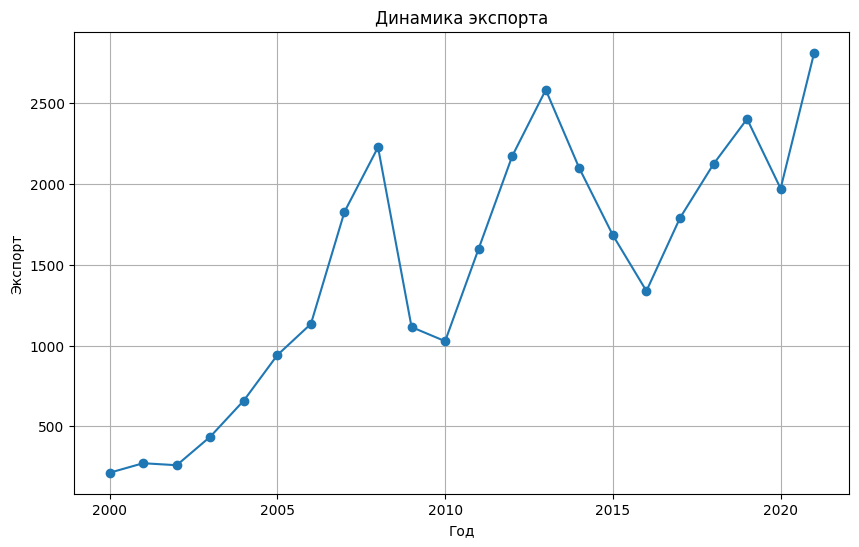

In [ ]:
import matplotlib.pyplot as plt

data_column = 'Экспорт'

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Год'], data[data_column], marker='o')
plt.title('Динамика экспорта')
plt.xlabel('Год')
plt.ylabel(data_column)
plt.grid(True)
plt.show()

##Критерий серий, основанный на медиане


Найдем медиану:

In [ ]:
median_yield = data[data_column].median()
median_yield

1642.0749999999998

После этого по исходному временному ряду образуем «серии» из плюсов и
минусов, на статистическом анализе которых основана процедура проверки
гипотезы о неизменности среднего значения временного ряда. Выведем количество таких серий

In [ ]:
# Определение серий: значения выше или ниже медианы
above_median = data[data_column] > median_yield
series = above_median.ne(above_median.shift()).cumsum()
series_counts = series.value_counts()

# Количество серий
num_series = len(series_counts)
num_series

6

Вычислим максимальную длину серий:

In [ ]:
# Нахождение длины каждой серии
series_lengths = series.map(series.value_counts())

# Нахождение максимальной длины серии
max_series_length = series_lengths.max()
max_series_length

7

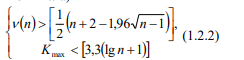

Проверим следующие неравенства:

In [ ]:
from math import sqrt, log10

n = len(data[data_column])
first_equel = int(1/2*(n+2-1.96*sqrt(n-1)))

second_equel = int((log10(n) + 1) * 3.3)
first_equel, second_equel

(7, 7)

In [ ]:
if num_series > first_equel and max_series_length < second_equel:
  print('Ни одно из неравенств не нарушено.')
else:
  print('Нарушено одно или два неравенства.')

Нарушено одно или два неравенства.


Таким образом, гипотеза о неизменности среднего значения временного ряда
не отвергается с вероятностью ошибки α и тем самым подтверждается
отсутствие тенденции.

##Критерий «восходящих» и «нисходящих» серий

Этот критерий улавливает постепенное смещение среднего значения в
исследуемом распределении не только монотонного, но и более общего,
например периодического характера.
Исследуется последовательность знаков – плюсов и минусов.

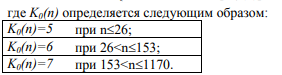

Вычислим Kn, иничиализируем неравенство:

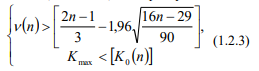

In [ ]:
k_n  = 5 # стандартное значение
if n <= 26:
  k_n = 5
elif n>21 and n<=153:
  k_n = 6
elif n>153 and n<=1170:
  k_n = 7

first_equel = int((2*n - 1) / 3 - 1.96*sqrt((16*n - 29)/90))

second_equel = k_n
first_equel, second_equel

(10, 5)

In [ ]:
if num_series > first_equel and max_series_length < second_equel:
  print('Ни одно из неравенств не нарушено.')
else:
  print('Нарушено одно или два неравенства.')

Нарушено одно или два неравенства.


Таким образом, гипотеза о неизменности среднего значения временного ряда
не отвергается с вероятностью ошибки α и тем самым подтверждается
отсутствие тенденции.

##Сравнение средних уровней ряда с использованием F-критерия Фишера

Разделим ряд на две примерно равные части по числу частей. Вычислим для каждой половины среднее:

In [ ]:
from scipy.stats import ttest_ind

# Разделение данных на две равные части
n = len(data)
half = int(n / 2)
first_half = data[data_column].iloc[:half]
second_half = data[data_column].iloc[half:]

# Расчет средних значений для каждой части
mean_first_half = first_half.mean()
mean_second_half = second_half.mean()


mean_first_half, mean_second_half, first_half, second_half, n

(919.5909090909091,
 2052.895454545455,
 3      213.0
 7      271.8
 11     259.5
 15     436.3
 19     660.0
 23     941.5
 27    1134.5
 31    1828.4
 35    2228.3
 39    1114.8
 43    1027.4
 Name: Экспорт, dtype: float64,
 47    1600.55
 51    2173.70
 55    2583.60
 59    2098.10
 63    1683.60
 67    1338.20
 71    1790.10
 75    2124.20
 79    2403.50
 83    1972.70
 87    2813.60
 Name: Экспорт, dtype: float64,
 22)

Расчитаем их дисперсию:

In [ ]:
# Расчет дисперсий для каждой части
variance_first_half = first_half.var()
variance_second_half = second_half.var()

variance_first_half, variance_second_half

(429063.008909091, 193224.1692272727)

Найдем F рассчетное:

In [ ]:
f_r = max(variance_first_half, variance_second_half) / min(variance_first_half, variance_second_half)
f_r

2.220545238336213

Найдем F табличное:

In [ ]:
from scipy.stats import f

# Уровень значимости (alpha)
alpha = 0.05

# Табличное значение F для заданного alpha, dfn и dfd
F_critical = f.ppf(1 - alpha, half, n - half - 1)
F_critical

2.9429572680064884

In [ ]:
if f_r < F_critical:
  print('тренд отсутствует')
else:
  print('тренд присутствует')

тренд отсутствует


Так как Fрасч<Fтабл(0,05; 6; 7), то с вероятностью 95% не оснований отвергать
нулевую гипотезу, выборочные дисперсии различаются незначительно
(расхождение между ними есть величина случайная). Отсюда вывод: тренд
урожайности ячменя отсутствует

In [ ]:
from scipy.stats import ttest_ind

# Применение t-критерия Стьюдента для сравнения средних двух выборок
t_stat, p_value = ttest_ind(first_half, second_half)

t_stat, p_value

(-4.7648314966645255, 0.00011825012613473753)

Результаты t-теста Стьюдента для сравнения средних значений экспорта в двух половинах временного ряда по Челябинской области следующие:

Значение t-статистики: -4.76
p-значение: 0.000118
Так как p-значение намного меньше стандартного порога статистической значимости (0.05), мы отвергаем нулевую гипотезу о равенстве средних. Это означает, что существует статистически значимое различие между средними значениями экспорта в первой и второй половинах временного ряда.

В сочетании с положительным углом наклона в анализе линейной регрессии, это указывает на наличие восходящего тренда в данных экспорта Челябинской области.